# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction

This dataset contains civilian complaints against New York City Police Officers. It includes information about the complaintant's and police officer's gender, age, and ethnicity. As well as the police officer's shield number, rank and command (during the complaint and now), and unique police officer id. This dataset also includes the month and year the complaint was received and closed. It also provides information about the reason the police officer approached the civilian in the first place, the civilian's alegation against the officer, and the result given on the alegation made by the New York City Civilian Complaint Review Board

We primarily kept the following questions in mind while we were exploring this dataset: 
 - Does the duration of a complaint depend on the ethnicity of the officer?
 - Are white-officer vs non-white complaintant cases more likely to go against the complainant?
 - Are complaints filed against non-white police more successful than those against white police?
 
Some these questions we primarily analyzed for the Exploratory Data Analysis, but the question we will be specifically analyzing for this dataset is:
* Does the duration of a complaint depend on the ethnicity of the officer?


### Cleaning and EDA
#### Cleaning 
* We changed "Unknown", and "Refused" to np.nan in 'complainant_ethnicity' column and changed "Not described" to np.nan in 'complainant_gender' column. We changed "Refused" to np.nan because the questons we are asking do not use the refusal information, so it is equivalent to being missing for us. 


* We also decided to combine the year_received and year_closed date columns into two approximate datetime columns. Since we were not provided a day for these complaints, we assumed that they all started on the first of the month. This assumption could definetely impact the way our data appears compared to the real dataset, however this was the best way to convert the data in an analyzable manner that made sense. 


* We created an approximate duration column which was the time delta between the date received and date closed in order to be able to answer our question about the length of time different complaints are open for.


* Since one of our questions had to do with analysizing the successs of a complaint, we created a column where the value was True if the complaintant was successful in getting a substantiated result from the governing board and False otherwise. 


* We created a column where the value was True if the Police Officer's Ethnicity in the complaint is White and False otherwise in order to help us compare distributions of White and Non-White Officers


* We dropped all unnessesary columns such as names, and id's because they were not relevant to our questions.

#### EDA
For question 1, we created some groupings, bar charts (too visualize the ditributions) and pivot tables (to view data based on multiple groupings) to see how the average duration of a complaint differed based on the officer's ethnicity.

For question 2, we plotted a graph showing the distribution of police ethnicities and created a graph comparing White and Non-White distributions and the number of successful and failed complaint attempts for each.

For question 3 we looked into tables and graphs that showed the proportion of successful complaints and their durations based on officer ethnicity.


### Assessment of Missingness
By analyzing the dataset, we have found that there are missing values in the 'complainant_gender' column and the 'complainant_ethnicity' column. Since the questions we looked at pertained more toward the ethnicity of the complaintant rather than their gender, the missingness column we assesed is the 'complainant_ethnicity' column.


#### NMAR or Not NMAR
* We believe that the missingness in our 'complainant_ethnicity' data is not NMAR because we believe that people are more likely to omit their race when complaining to a white officer because they could be treated unfairly. NMAR is when the missingness of a value depends on the value itself, but in this case, the missingness depends on the ethnicity of the officer so it is not NMAR.

#### Testing MAR on 'complainant_gender' Column
* We decided to first test MAR the 'complainant_gender' column to ensure that we were testing MAR properly.
* Null Hypothesis: The missingness of the 'complainant_ethnicity' column does not depend on the 'complainant_gender' column
* Alternative Hypothesis: The missingness of the 'complainant_ethnicity' column does depend on the 'complainant_gender' column
* Test Statistic: TVD
* Result: P-Value of 0.99. Therefore, the Null Hypothesis is not rejected. This result makes sense as the complaintant's gender should have nothing to do with the missingness of a complaintant's ethinicity.

#### Testing MAR on 'officer_is_white' Column
* We then decided to test our not NMAR theory by testing MAR on the 'officer_is_white' column
* Null Hypothesis: The missingness of the 'complainant_ethnicity' column does not depend on the 'officer_is_white' column
* Alternative Hypothesis: The missingness of the 'complainant_ethnicity' column does depend on the 'officer_is_white' column
* Test Statistic: TVD
* Result: P-Value of 0. Therefore, we reject the null hypothesis. This confirmed our belief that the missingness of 'complainant_ethnicity' is dependent on if the officer is white or not.

From this missingness analysis, we realized that the complaintant ethnicity data may not be entirely accurate due to the fact that it is dependent of the ethnicity of the police officer. This would bias the duration of the question we are looking at: "Does the duration of a complaint depend on the ethnicity of the officer?".


### Hypothesis Test

#### For our hypothesis test, we chose to focus on the following question:
 -Does the duration of a complaint depend on the ethnicity of the officer?
* Null Hypothesis: The distributions for the duration of complaints against officers that are white and the duration of complaints against officers that are not white are identical. 
* Alternative Hypothesis: The durations for the complaints filed against officers that are not white take longer to be resolved than those filed against white officers. 
* Test Statistic: Difference of Means. We decided to use this test statistic since the distbrutions have a similar shape, as depicted below. We chose to make it signed becuase our alternative hypothesis specifies that the duration for complaints against officers that are not white take longer
* Results: P-Value of 0. This is evidence against the null hypothesis and suggests that the distributions for  duration of complaints against nonwhite officers and white officers are not the same. 

These results provides us with some insight into whether or not the officer's race has any relation to the duration of the complaint filed against them. Based on our results, we can conclude that the differences in the duration of complaints against nonwhite officers and white officers are not due to random chance and from the same distribution.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
complaints = pd.read_csv('CCRB-Complaint-Data_202007271729/allegations_202007271729.csv')
pd.set_option('display.max_columns', None)

Questions: 
 - Does the duration of a complaint depend on the ethnicity of the officer?
 - Are white-officer vs non-white complaintant cases more likely to go against the complainant?
 - Are complaints filed against non-white police more successful than those against white police?

### Cleaning and EDA

Changing "Unknown", and "Refused" to np.nan in 'complainant_ethnicity' column and changing "Not described" to np.nan in 'complainant_gender' column. Were changing "Refused" to np.nan because the questons we are asking do not use the refusal information, so it is equivalent to being NaN for us. 


In [3]:
complaints['complainant_gender'] = complaints['complainant_gender'].replace({'Not described': np.nan})
complaints['complainant_ethnicity'] = complaints['complainant_ethnicity'].replace({'Unknown':np.nan, 'Refused': np.nan})

Combining the year_received and year_closed date columns into two approximate datetime columns. Since we are not provided a day for these complaints, we are assuming that they all start on the first of the month. 


In [4]:
days = np.ones(complaints.shape[0])
approx_start = complaints[['year_received', 'month_received']].assign(day_received = days)
approx_start = pd.to_datetime(dict(year=approx_start.year_received, 
                                   month=approx_start.month_received, 
                                   day=approx_start.day_received))

approx_end = complaints[['year_closed', 'month_closed']].assign(day_closed = days)
approx_end = pd.to_datetime(dict(year=approx_end.year_closed, 
                                   month=approx_end.month_closed, 
                                   day=approx_end.day_closed))

complaints = complaints.drop(columns = ['year_closed', 'month_closed', 'year_received', 'month_received'])
complaints = complaints.assign(approx_start = approx_start, approx_end = approx_end)

Creating an approximate duration column which is the time delta between the date received and date closed.

In [14]:
approx_duration = complaints['approx_end'] - complaints['approx_start']
complaints = complaints.assign(approx_duration = approx_duration.dt.days)

Creating a column where the value is True if the complaintant was successful in getting a substantiated result from the governing board and False otherwise.

In [15]:
complaints['complaint_successful'] = complaints['board_disposition'].apply(lambda x: True if x.split(' ')[0] == 'Substantiated' else False)

Creating a column where the value is True if the Police Officer's Ethnicity in the complaint is White and False otherwise.

In [7]:
complaints['officer_is_white'] = complaints['mos_ethnicity'].apply(lambda x: 'Yes' if x == 'White' else 'No')

Dropping all unnessesary columns such as names, and id's that are not relevant to our questions

In [31]:
complaints = complaints.drop(columns = ['first_name', 'last_name', 
                           'shield_no', 'command_at_incident', 
                           'rank_abbrev_incident', 'rank_abbrev_now', 
                           'rank_now', 'rank_incident', 
                           'mos_age_incident', 'complainant_age_incident', 
                           'fado_type', 'allegation', 
                           'precinct', 'contact_reason', 
                           'outcome_description', 'command_now', 
                           'unique_mos_id', 'complaint_id', 
                           'mos_gender'])
complaints.head(5)

KeyError: "['first_name' 'last_name' 'shield_no' 'command_at_incident'\n 'rank_abbrev_incident' 'rank_abbrev_now' 'rank_now' 'rank_incident'\n 'mos_age_incident' 'complainant_age_incident' 'fado_type' 'allegation'\n 'precinct' 'contact_reason' 'outcome_description' 'command_now'\n 'unique_mos_id' 'complaint_id' 'mos_gender'] not found in axis"

#### Question 1: Does the duration of a complaint depend on the ethnicity of the officer?

Below are some plots and graphs that show the distribution of the durations based on officer ethnicities. The pivot table shows the approximate durations based on if a complaint was successful, and the ethnicity of the officer

,approx_duration
mos_ethnicity,
American Indian,330.312500
Asian,279.428693
Black,295.926483
Hispanic,305.107432
White,292.924643


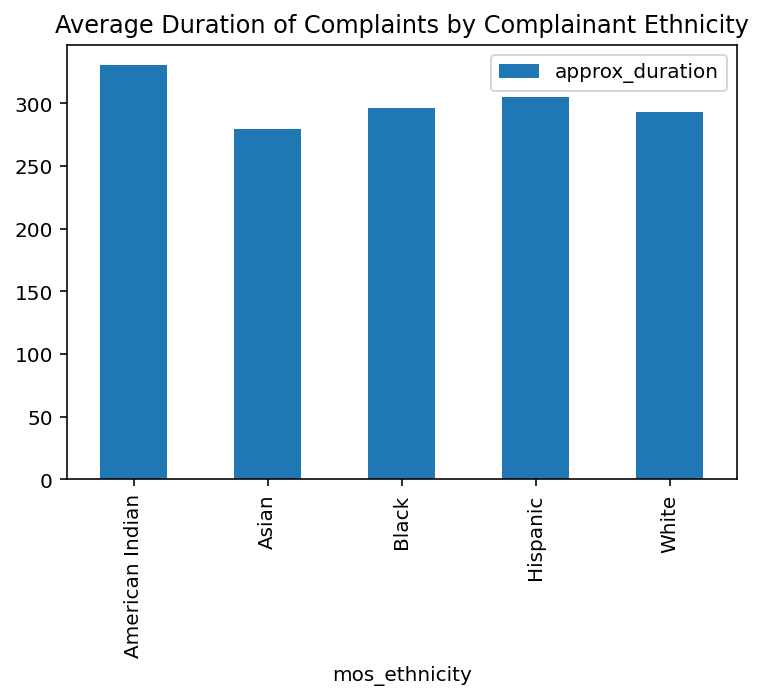

In [9]:
gbrace = complaints.groupby('mos_ethnicity').mean()['approx_duration']
gbrace = pd.DataFrame(gbrace)
gbrace.plot(kind='bar',title='Average Duration of Complaints by Complainant Ethnicity')
gbrace

In [10]:
complaints.pivot_table(index='mos_ethnicity',columns='complaint_successful',aggfunc='mean')

approx_duration            
complaint_successful           False       True 
mos_ethnicity                                   
American Indian           340.428571  259.500000
Asian                     286.554187  263.620219
Black                     294.517653  300.103060
Hispanic                  310.136437  290.293661
White                     295.512624  284.808924

#### Question 2: Are white-officer vs non-white officer complaintant cases more likely to go against the complainant?

Distribution of Police Ethnicities: (Note: American Indians are in the graph, but they have a really small total in this dataset.)

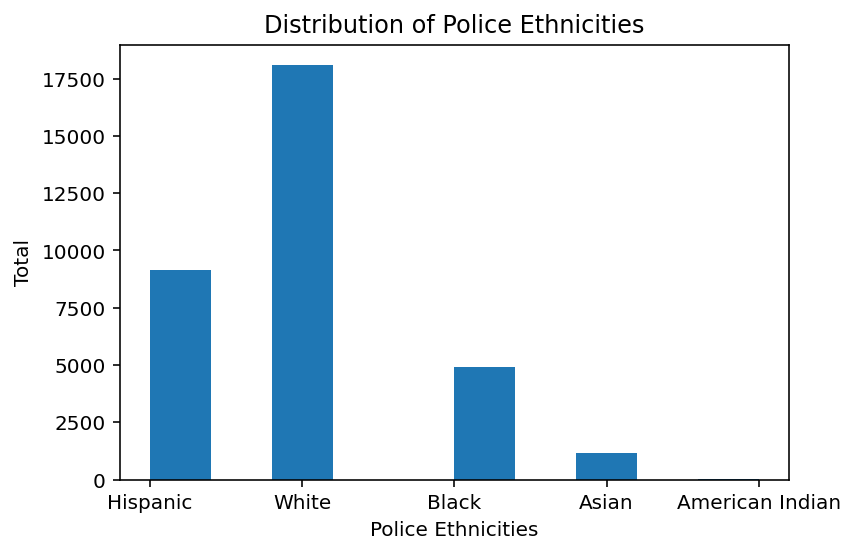

In [95]:
plt.hist(complaints['mos_ethnicity'])
plt.xlabel('Police Ethnicities')
plt.ylabel('Total')
plt.title('Distribution of Police Ethnicities')
plt.show()

Graph Comparing White and Non-White distributions and the number of successful and failed complaint attempts for each.

#### Question 2: Are white-officer vs non-white officer complaintant cases more likely to go against the complainant?

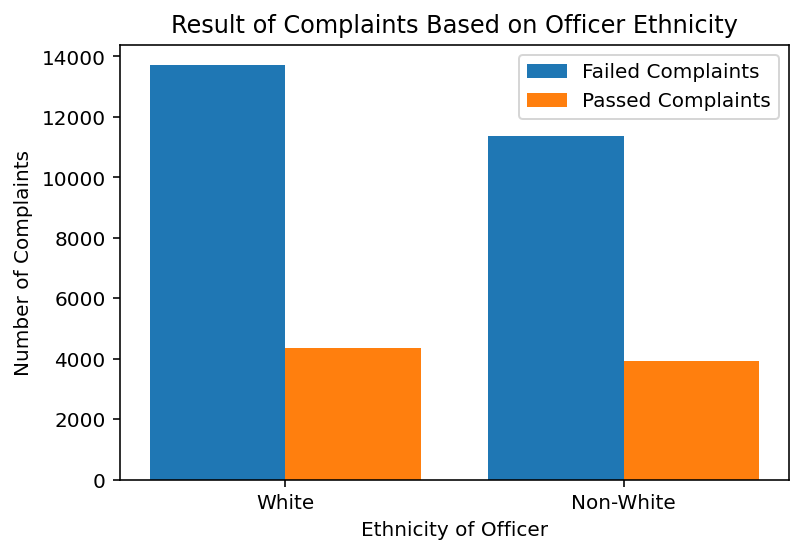

In [96]:
white_failed_complaint = complaints[(complaints['complaint_successful'] == False) & (complaints['mos_ethnicity'] == 'White')].shape[0]
nonwhite_failed_complaint = complaints[(complaints['complaint_successful'] == False) & (complaints['mos_ethnicity'] != 'White')].shape[0]

white_pass_complaint = complaints[(complaints['complaint_successful'] == True) & (complaints['mos_ethnicity'] == 'White')].shape[0]
nonwhite_pass_complaint = complaints[(complaints['complaint_successful'] == True) & (complaints['mos_ethnicity'] != 'White')].shape[0]

num_of_failed = [white_failed_complaint, nonwhite_failed_complaint]
num_of_pass = [white_pass_complaint, nonwhite_pass_complaint]

value = ['White', 'Non-White']

X_axis = np.arange(len(value))

plt.bar(X_axis - 0.2, num_of_failed, 0.4, label = 'Failed Complaints')
plt.bar(X_axis + 0.2, num_of_pass, 0.4, label = 'Passed Complaints')
plt.xticks(X_axis, value)
plt.xlabel('Ethnicity of Officer')
plt.ylabel('Number of Complaints')
plt.title('Result of Complaints Based on Officer Ethnicity')
plt.legend()
plt.show()

#### Question 3: Are complaints filed against non-white police more successful than those against white police?

These graphs group the data based on the officer ethnicity, copare the proporiton of successful complaints by race. At the end is a pivot table that groups the data based on officer ethncicity and whether or not the complaint was sucessful

,proportion_successful
mos_ethnicity,
American Indian,0.125000
Asian,0.310696
Black,0.252234
Hispanic,0.253443
White,0.241784


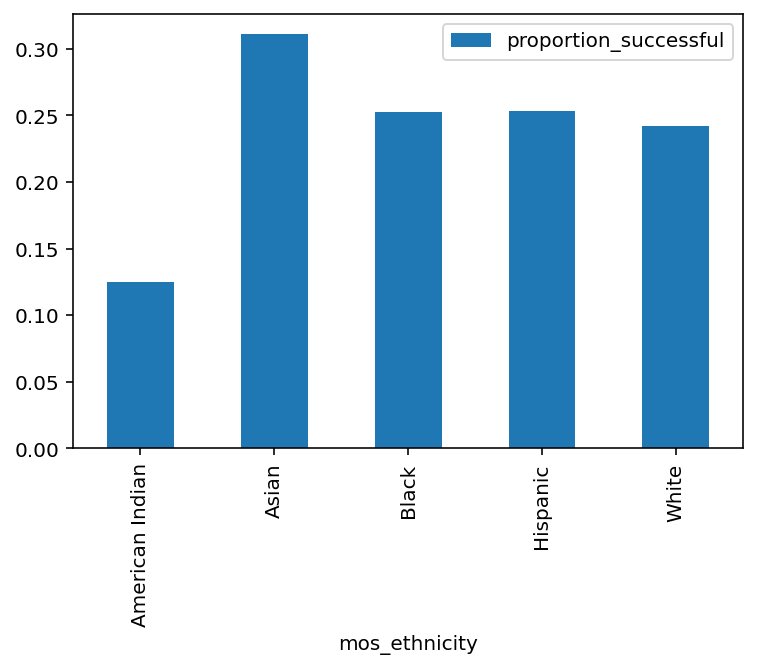

In [97]:
#Grouping data by mos ethnicity to get an idea of how it looks
successful_by_ethnicity = complaints.groupby('mos_ethnicity').sum()['complaint_successful']
#Getting the number of complaints against each ethnciity, since the complaint_successful colunmn is a boolean sum would be num of true 
num_complaints_by_ethnicity = complaints.groupby('mos_ethnicity').count()['complaint_successful']
proportion_successful = pd.DataFrame()
proportion_successful['proportion_successful'] = successful_by_ethnicity/num_complaints_by_ethnicity
#this shows the proportion of complaints that are successful by race
proportion_successful
proportion_successful.plot(kind='bar')
proportion_successful

In [98]:
gbwhite = complaints.groupby('officer_is_white').sum()['complaint_successful']
#series with the number of successful complaints vs white and non white
gbwhite_counts = complaints.groupby('officer_is_white').count()['complaint_successful']
gbwhite_proportions = pd.DataFrame(gbwhite/gbwhite_counts)
gbwhite_proportions

,complaint_successful
officer_is_white,
No,0.257197
Yes,0.241784


In [99]:
#Pivot table shows the raw numbers of the values in the data
comp_pt = complaints.pivot_table(index='officer_is_white',columns=['complaint_successful'],aggfunc='size')
comp_pt

complaint_successful,False,True
officer_is_white,,
No,11353,3931
Yes,13704,4370


In [100]:
#This pivot table shows the average duration of successful and unsuccessful complaints, based on the officer's ethncicity
ethn_pt = complaints.pivot_table(index='mos_ethnicity',columns=['complaint_successful'],aggfunc= 'mean')['approx_duration']
ethn_pt

complaint_successful,False,True
mos_ethnicity,,
American Indian,340.428571,259.500000
Asian,286.554187,263.620219
Black,294.517653,300.103060
Hispanic,310.136437,290.293661
White,295.512624,284.808924


### Assessment of Missingness

For our assessment of missingness, we will investigate the missingness of the values in our `complainant_ethnicity` column in
relation to the `officer_ethnicity` and `complainant_gender` columns of  our data. As shown below, the `complainant_ethnicity` column has 5764 null entries. 

In [101]:
#There are 5764 null entries in this column
print(complaints['complainant_ethnicity'].isna().sum())
#Calculates the proportion of null entries in column by number of null entries / total entries in column
complaints['complainant_ethnicity'].isna().sum()/complaints.shape[0]

5764


0.17279213382097247

#### Permutation Test 1

For our first permutation test, we would like to explore and see if there is a relationship between the misisgness  `complainant_ethncity` and the value of `complainant_gender`. While not directly related any of our questions, it could provide potential lines of inquiry if these two columns are in fact related. For example, if the two columns are related, that could suggest that complainants refuse to specificy both their gender and their race when complaining about an officer because they believe that it would unfailry influence the outcome of their complaint. In our permutation test below, our test statistic is the TVD between the distbrution of null values by complaintant gender. This is depicted by the pivot table and bargraph below. Our null hypothesis is that the data is MCAR, meaning that the columns do not depend on each other.

In [102]:
#Pivot table showing distbrution of null values by complaintant gender
distr = (
    complaints
    .assign(is_null=complaints['complainant_ethnicity'].isnull())
    .pivot_table(index='is_null', columns='complainant_gender', aggfunc='size')
    .fillna(0)
)
distr = (distr.T/distr.sum(axis=1)).T
#The observed tvd from our data 
obs = distr.diff(axis=1).iloc[:,-1].abs().sum() / 2
distr

complainant_gender,Female,Gender non-conforming,Male,Transman (FTM),Transwoman (MTF)
is_null,,,,,
False,0.171534,0.000073,0.827486,0.000181,0.000726
True,0.189890,0.000000,0.810110,0.000000,0.000000


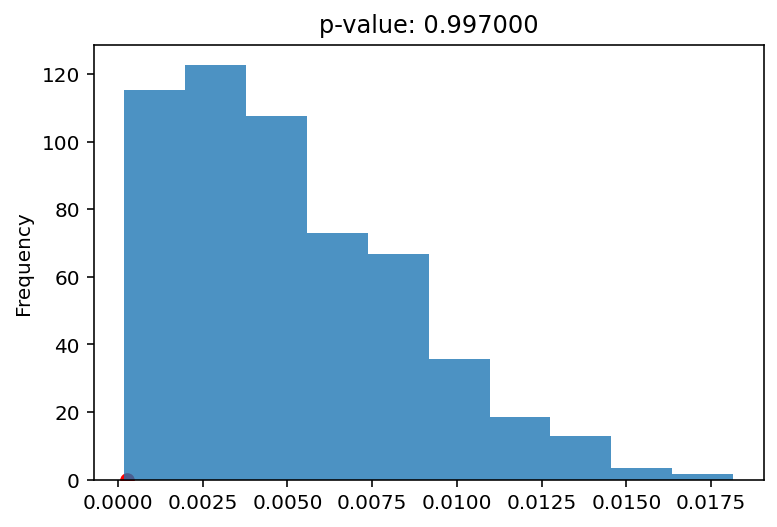

In [103]:
#This is the code for the permutation test
n_repetitions = 1000

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        complaints['complainant_gender']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        complaints
        .assign(**{
            'complainant_gender': shuffled_col,
            'is_null': complaints['complainant_ethnicity'].isnull()
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='complainant_gender', aggfunc='size')
        .fillna(0)
        .apply(lambda x:x.T / x.sum(), axis=1).T
    )
    
    tvd = shuffled.diff(axis=1).iloc[:,-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)
    
pval = np.mean(tvds >= obs)
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

##### Results of Test 1

Based on the results above, our value was 0.997. This suggests that `complainant_ethnicity` is not dependant on the `complainant_gender` column. Based on this, we can conclude that there is likely no relationship between the two columns. Howwever, there is a possibility that `complainant_ethnicity` is MAR depenant on another column, so we would need to conduct more permutation tests for further investigation. 

#### Permutation Test 2

For our second permutation test, we will test to see whether or not the missingness in `complainant_ethnicity` is dependant on the values in the `officer_is_white` column. Firstm we create an isnull column that contains the value `True` if the entry in `complainant_ethnicity` is null, and `False` otherwise. Our relevant data can be grouped into a pivot table, as shown below. We then run our permutation test where the test statistic is the tvd between our distributions, which are the values of `is_null` when the officer is white, and the values of `is_null` when the officer is not white. By default, we would assume that the columns are not dependant on one another so our null hypothesis is that our two distributions are actually the same.

In [68]:
#This is a pivot table of the values
complaints['is_null'] = complaints['complainant_ethnicity'].isnull()
dist = complaints.pivot_table(index='is_null',columns='officer_is_white',aggfunc='size')
#The observed tvd from our data 
obstvd = dist.diff(axis=1).iloc[:,-1].abs().sum() / 2

0.0

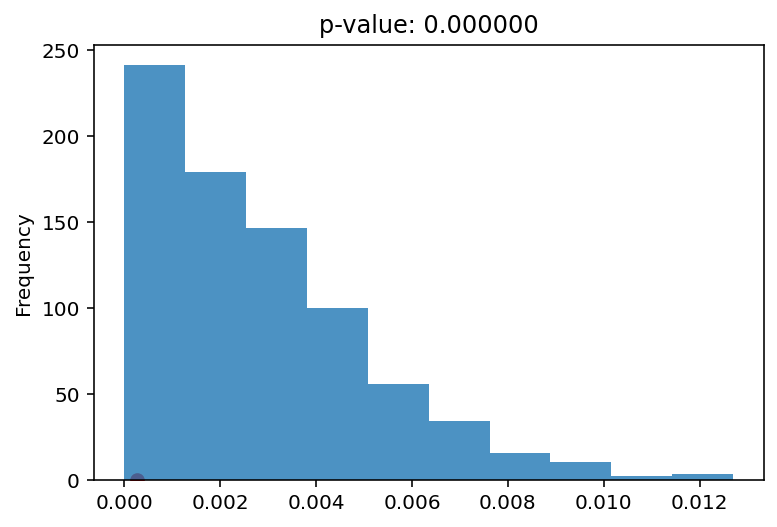

In [69]:

n_permutations = 1000
#Creates an empty dataframe that contains two columnbs from our original
#Dataframe, 'is_null' and 'officer_is_white' for our permutation test

c = pd.DataFrame()
c['is_null'] = complaints['is_null']
c['officer_is_white'] = complaints['officer_is_white']
tvds = []
for _ in range(n_permutations):
    shuffled_col = c['officer_is_white'].sample(replace=False,frac=1).reset_index(drop=True)
    c['officer_is_white'] = shuffled_col
    shuffled = c.pivot_table(index='is_null',columns='officer_is_white',aggfunc='size')
    shuffled = (shuffled.T/shuffled.sum(axis=1)).T
    tvd = shuffled.diff().iloc[:,-1].abs().sum() / 2
    tvds.append(tvd)
#Calulate the p-value
pval = np.mean(tvds >= obstvd)
#Plot our results 
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);
pval

##### Results of Test 2

As shown in the resutls above, our observed statistic is quite extreme and is very unlikely to occur based on our null hypothesis. This goes against the null hypothesis and indicates that there is some sort of relationship between the two columns, where the missingness in `complainant_ethnicity` is dependant on the value of `officer_is_white`. As a result, we can conclude that the missing data in this column is MAR based on the `officer_is_white` column. These results provide us with possible insight and context for our main question, which is: Does the duration of a complaint depend on the ethnicity of the officer?
Because the columns are MAR, we infer that this missingness is biasing the overall durations for our dataset. It would be biased low because it is primarily discounting values of individuals who are nonwhite.

### Hypothesis Test

##### For our hypothesis test, we chose to focus on the following question:
 -Does the duration of a complaint depend on the ethnicity of the officer?
###### Null Hypothesis: 
 -The distributions for the duration of complaints against officers that are white and the duration of complaints against officers that are not white are identical. 
###### Alternative Hypothesis:  
 -The durations for the complaints filed against officers that are not white take longer to be resolved than those filed against white officers. 
###### Test Statistic
-Our test statistic is the difference of means.
 
-We decided to use this test statistic since the distbrutions have a similar shape, as depicted below.
 
-We chose to make it signed becuase our alternative hypothesis specifies that the duration for complaints against officers that are not white take longer
We believe that this hypothesis test with these components will help us with answering our questions becuase it will provide insight into whether or not durations of complaints against white officers and non white officers come from the same distribution, which will help us to decide if the duration of complaints is not related to the officer's ethnicity.

officer_is_white
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: approx_duration, dtype: object

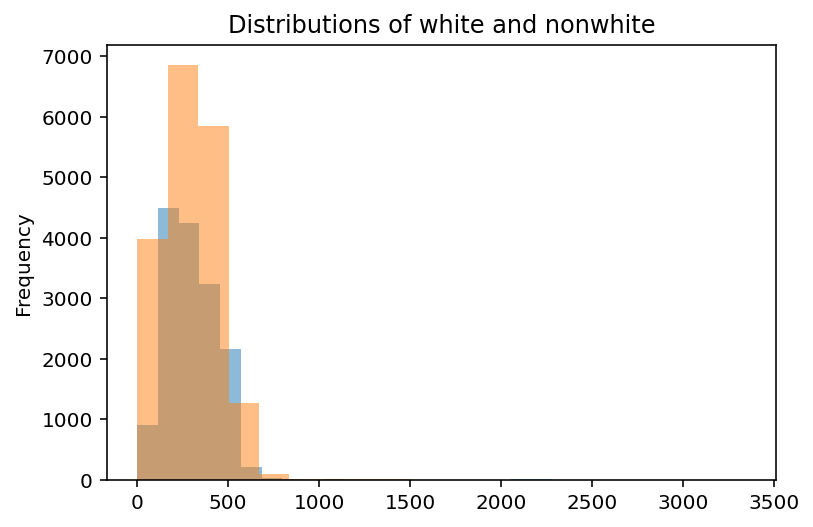

In [70]:
#Thhis is our first graph comparing the two distributions
#(Duration based on whether the officer is white or not )
complaints.groupby('officer_is_white')['approx_duration'].plot(kind='hist',alpha=0.5,bins=20,title='Distributions of white and nonwhite')

officer_is_white
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: approx_duration, dtype: object

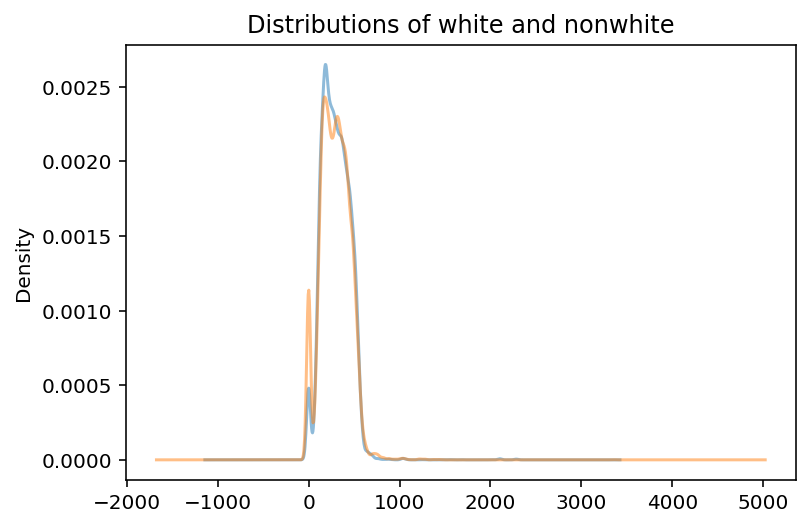

In [71]:
#This is our second graph comparing the two distributions
complaints.groupby('officer_is_white')['approx_duration'].plot(kind='kde',alpha=0.5,title='Distributions of white and nonwhite')

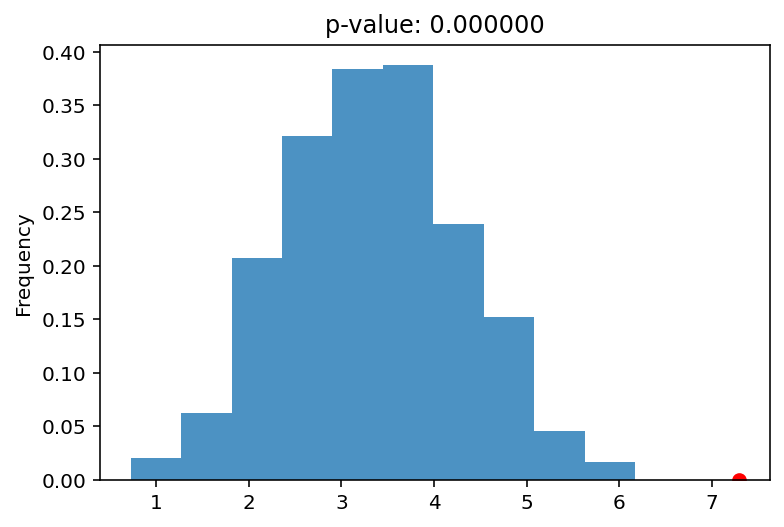

In [72]:
complaints.groupby('officer_is_white')['approx_duration'].mean()

obsved = complaints.groupby('officer_is_white')['approx_duration'].mean().loc['No'] - complaints.groupby('officer_is_white')['approx_duration'].mean().loc['Yes']
obsved
n_repetitions = 1000
df = pd.DataFrame()
#df['']
diffs = []
df['officer_is_white'] = complaints['officer_is_white']
df['approx_duration'] = complaints['approx_duration']
d2 = df.copy(deep=True)
for _ in range(n_repetitions):
    shuffled = df['officer_is_white'].sample(replace=False,frac=1).reset_index(drop=True)
    df['officer_is_white'] = shuffled
    stat = df.groupby('officer_is_white')['approx_duration'].mean().loc['No'] - complaints.groupby('officer_is_white')['approx_duration'].mean().loc['Yes']
    diffs.append(stat)
diffs=np.array(diffs)
pvalue = (diffs >= obsved).sum()/n_repetitions
pd.Series(diffs).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pvalue)
plt.scatter(obsved, 0, color='red', s=40);



#### Hypothesis Test Results

Our results ended with a p-value of zero. This is evidence against the null hypothesis and suggests that the distributions for  duration of complaints against nonwhite officers and white officers are not the same. This provides us with some insight into whether or not the officer's race has any relation to the duration of the complaint filed against them. Based on our results, we can conclude that the differences in the duration of complaints against nonwhite officers and white officers are not due to random chance and from the same distribution.